## **Before running the cell upload CLV.db file provided in the source code**

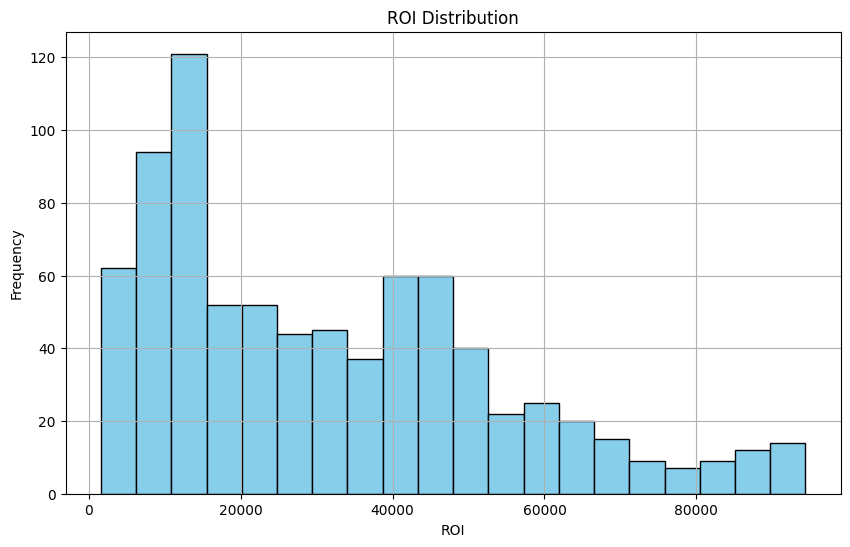

In [63]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('CLV.db')

query = "SELECT roi FROM customer_acquisition_data"
df = pd.read_sql_query(query, conn)

conn.close()

# Plot ROI distribution
plt.figure(figsize=(10, 6))
plt.hist(df['roi'], bins=20, color='skyblue', edgecolor='black')
plt.title('ROI Distribution')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [64]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn color palette
palette = sns.set_palette('Set2')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
 5   roi              800 non-null    float64
 6   cltv             800 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 43.9+ KB


In [66]:
data.describe()

,customer_id,cost,conversion_rate,revenue,roi,cltv
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250,315.668459,27.943935
std,231.0844,9.922337,0.059611,1259.543706,224.633316,22.995767
min,1.0000,5.246263,0.016341,500.000000,15.748588,0.257355
25%,200.7500,5.246263,0.043822,1694.000000,126.149701,5.769891
50%,400.5000,8.320327,0.043822,2764.000000,267.637389,24.756343
75%,600.2500,9.546326,0.123145,3824.250000,459.451814,41.939870
max,800.0000,30.450327,0.167592,4998.000000,943.672378,86.417026


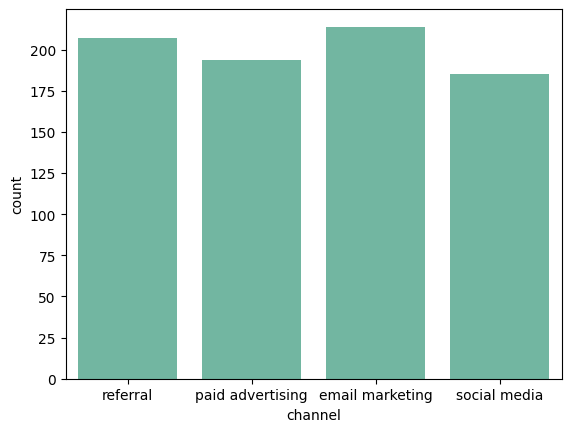

In [67]:
sns.countplot(data, x='channel');

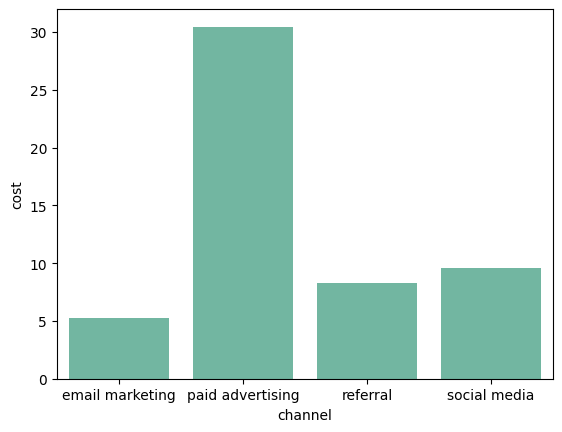

In [68]:
# Grouping the data based on 'channel'
channel_groups = data.groupby('channel')
# Aggregating 'cost' for each channel group
cost_by_channel = channel_groups['cost'].mean().reset_index()

sns.barplot(cost_by_channel, x='channel', y='cost');

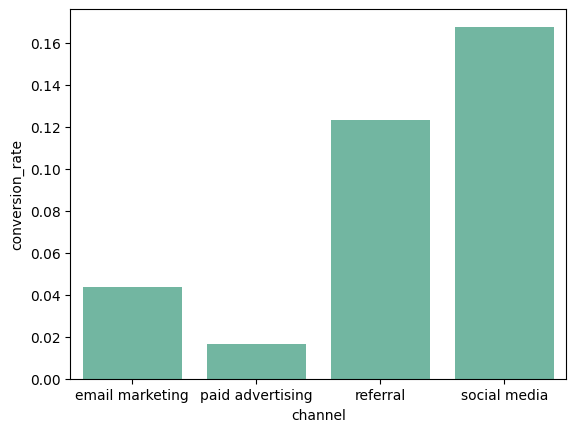

In [69]:
# Aggregating 'conversion_rate' for each channel group
conversion_rate_by_channel = channel_groups['conversion_rate'].mean().reset_index()

sns.barplot(conversion_rate_by_channel, x='channel', y='conversion_rate');

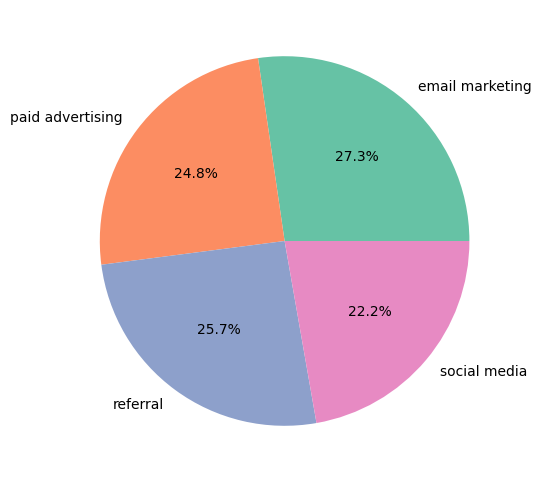

In [70]:
revenue_by_channel = channel_groups['revenue'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%');

In [71]:
data['roi'] = (data['revenue'] - data['cost']) / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


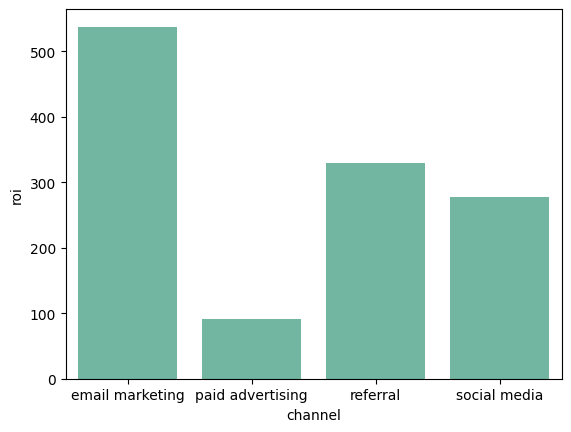

In [72]:
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

sns.barplot(roi_by_channel, x='channel', y='roi');

In [73]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


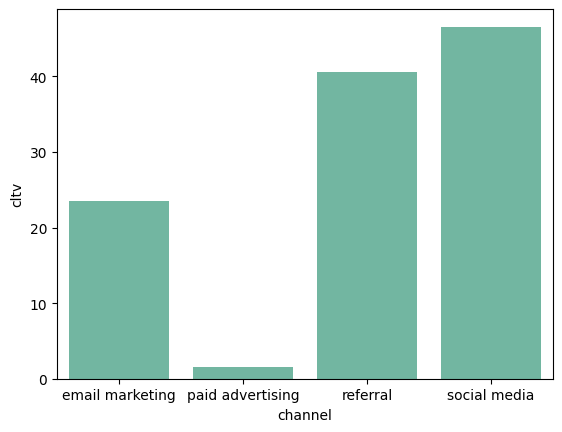

In [74]:
cltv_by_channel = data.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(cltv_by_channel, x='channel', y='cltv');

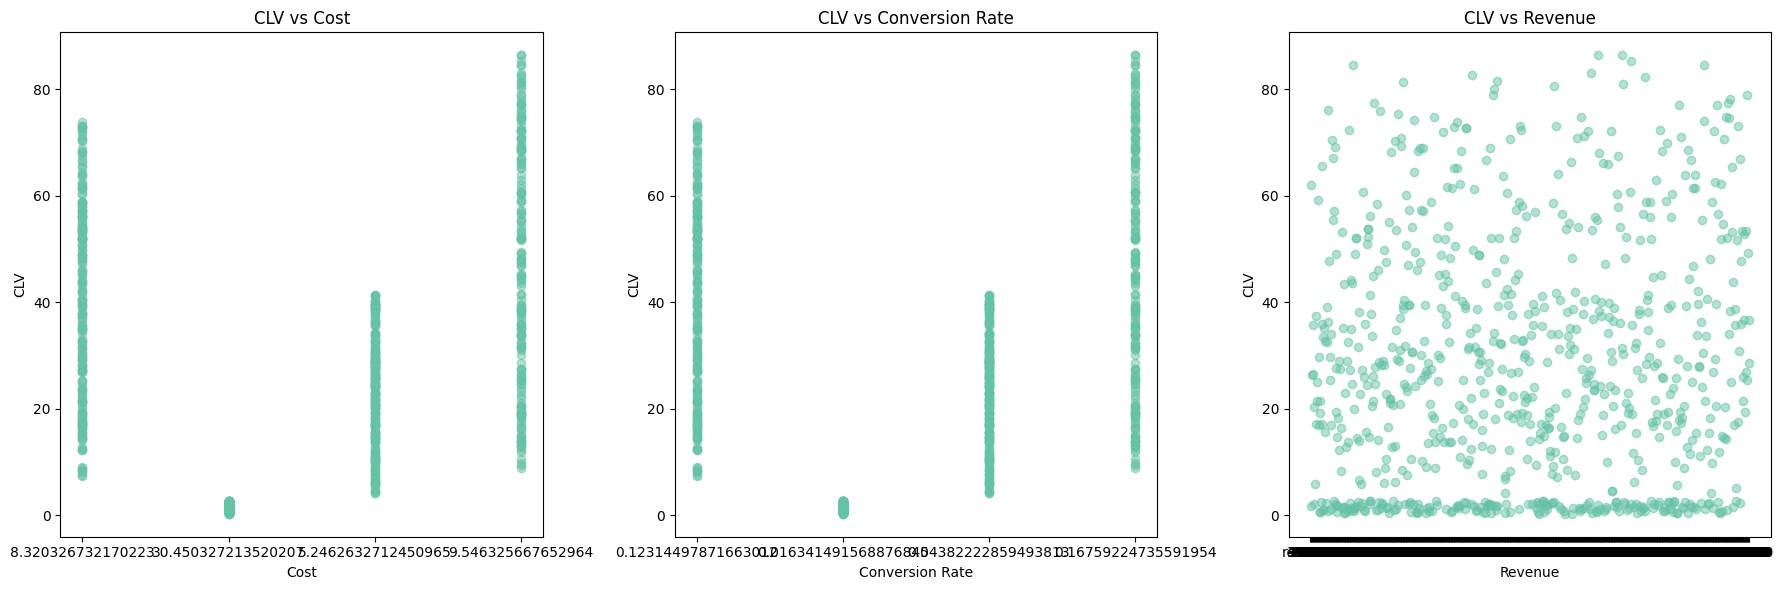

In [75]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('CLV.db')

# Read data from the database into a DataFrame
query = "SELECT clv, cost, conversion_rate, revenue FROM customer_acquisition_data"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Scatter plots to relate CLV with other features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for CLV vs Cost
axes[0].scatter(df['cost'].astype(str), df['clv'], alpha=0.5)
axes[0].set_title('CLV vs Cost')
axes[0].set_xlabel('Cost')
axes[0].set_ylabel('CLV')

# Scatter plot for CLV vs Conversion Rate
axes[1].scatter(df['conversion_rate'].astype(str), df['clv'], alpha=0.5)
axes[1].set_title('CLV vs Conversion Rate')
axes[1].set_xlabel('Conversion Rate')
axes[1].set_ylabel('CLV')

# Scatter plot for CLV vs Revenue
axes[2].scatter(df['revenue'].astype(str), df['clv'], alpha=0.5)
axes[2].set_title('CLV vs Revenue')
axes[2].set_xlabel('Revenue')
axes[2].set_ylabel('CLV')

plt.tight_layout()
plt.show()
